<a href="https://colab.research.google.com/github/Harish2303/Netflix-Data-Visualization/blob/main/Analyzing_and_Visualizing_Netflix_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyzing and Visualizing Netflix Data**

# Netflix Data Analysis and Visualization

In this notebook, we will analyze and visualize the Netflix dataset to extract meaningful insights. We will maintain a consistent aesthetic theme using shades of black and red for all visualizations.

In [1]:
pip install numpy pandas seaborn matplotlib plotly wordcloud scipy pillow kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import io

In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
# Setting the aesthetic theme for plots
sns.set(style="darkgrid")
plt.style.use('dark_background')

# Loading the Netflix dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))

# Previewing the dataset
df.head()

# Handling Missing Values
missing_values = df.isnull().sum()

# Filling missing 'country' values with 'United States'
df['country'].fillna('United States', inplace=True)

# Filling missing 'rating' with the most common rating 'TV-MA'
df['rating'].fillna('TV-MA', inplace=True)

# Confirming no missing values remain
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,0
date_added,11
release_year,0
rating,0
duration,0


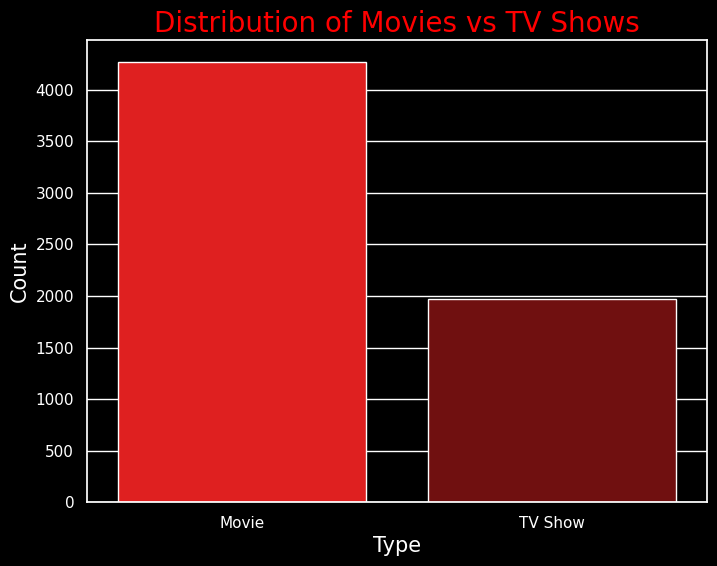

In [5]:
# Analysis and Visualization

# Distribution of Movies vs TV Shows
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=df, palette=['red', 'maroon'], hue='type')
plt.title('Distribution of Movies vs TV Shows', color='red', fontsize=20)
plt.xlabel('Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

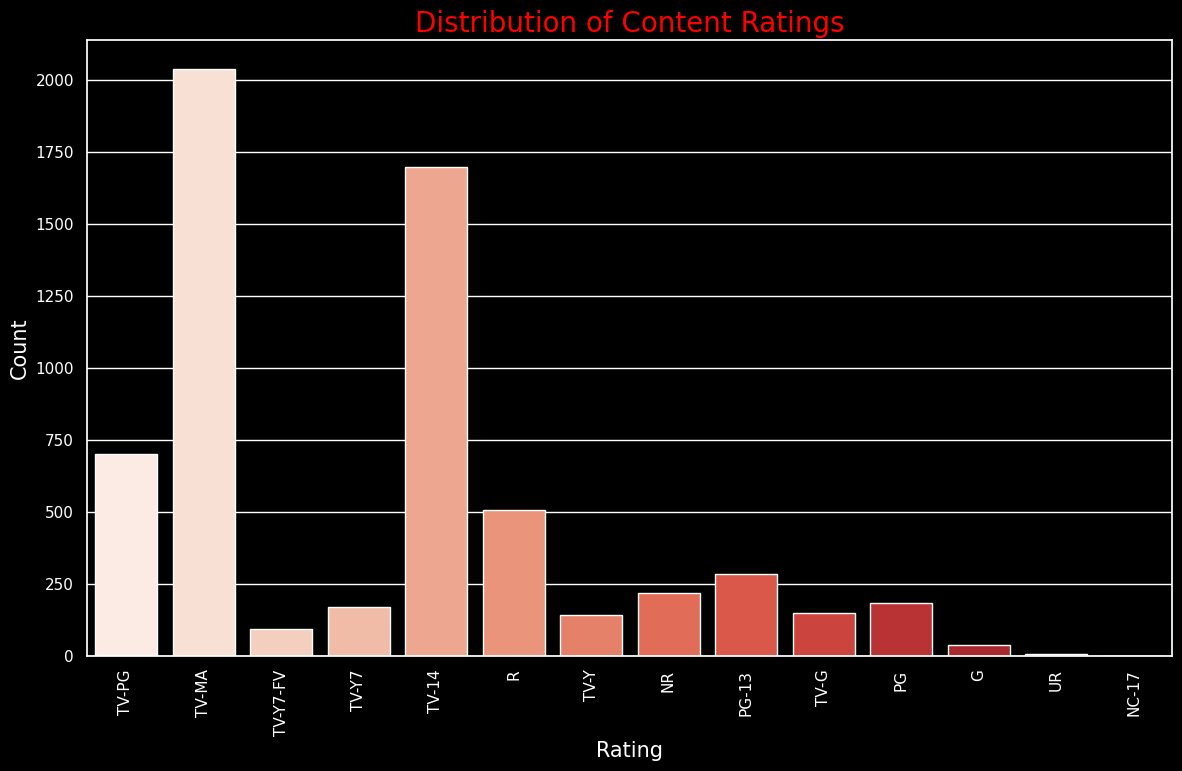

In [6]:
# Distribution of Ratings
plt.figure(figsize=(14,8))
sns.countplot(x='rating', data=df, palette='Reds', hue='rating')
plt.title('Distribution of Content Ratings', color='red', fontsize=20)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

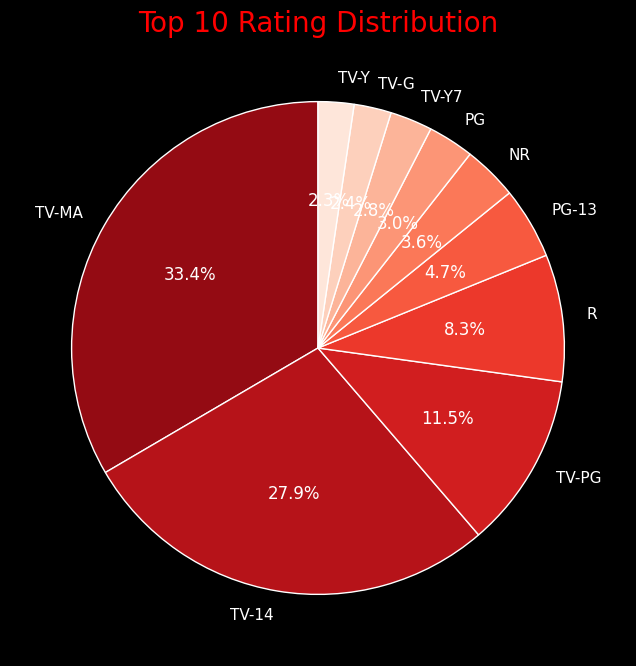

In [7]:
top_10_ratings = df['rating'].value_counts().nlargest(10)

colors = sns.color_palette("Reds", len(top_10_ratings))[::-1]  # Reversed to go from dark to light

plt.figure(figsize=(8,8))
top_10_ratings.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Top 10 Rating Distribution', color='red', fontsize=20)
plt.ylabel('')  # Removes the 'rating' label from the y-axis
plt.show()

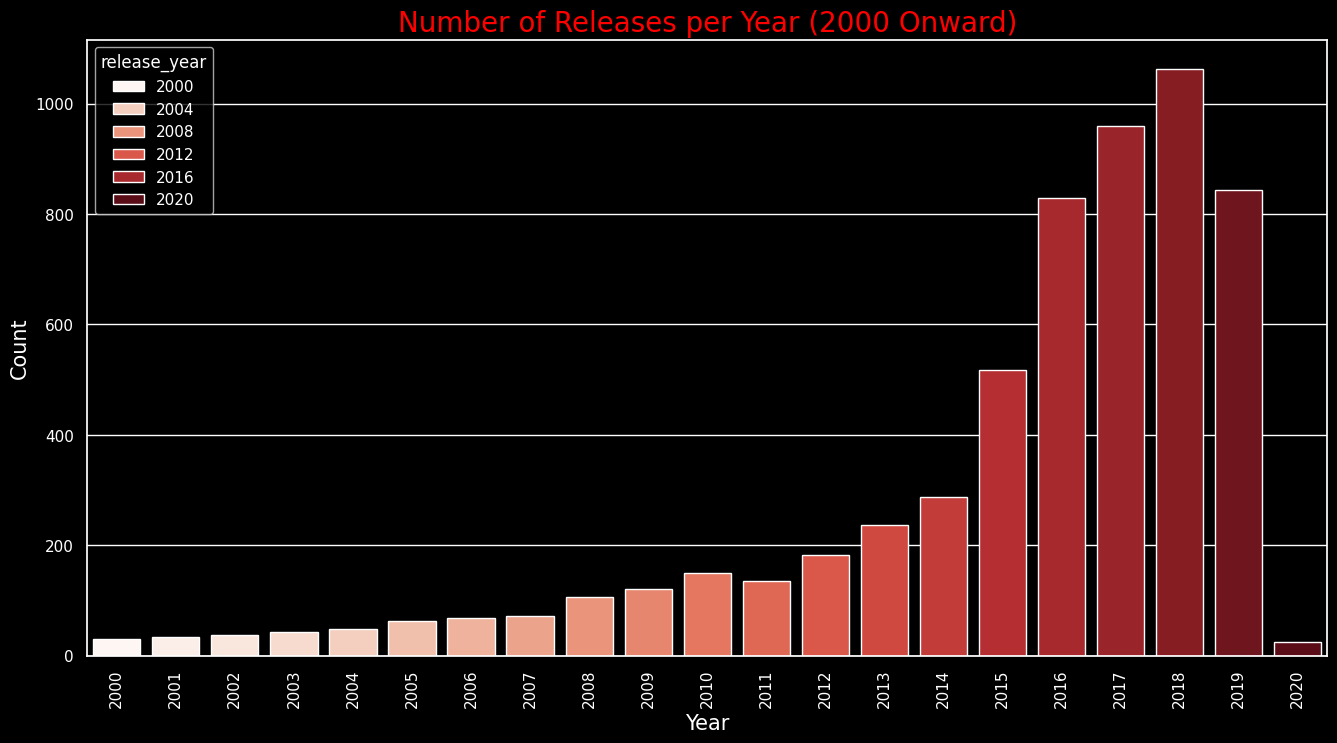

In [8]:
# Yearly Releases
# Step 1: Filter the DataFrame for years starting from 2000
df_filtered = df[df['release_year'] >= 2000]

# Step 2: Plot the number of releases per year starting from 2000
plt.figure(figsize=(16,8))
sns.countplot(x='release_year', data=df_filtered, palette='Reds', hue='release_year')
plt.title('Number of Releases per Year (2000 Onward)', color='red', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

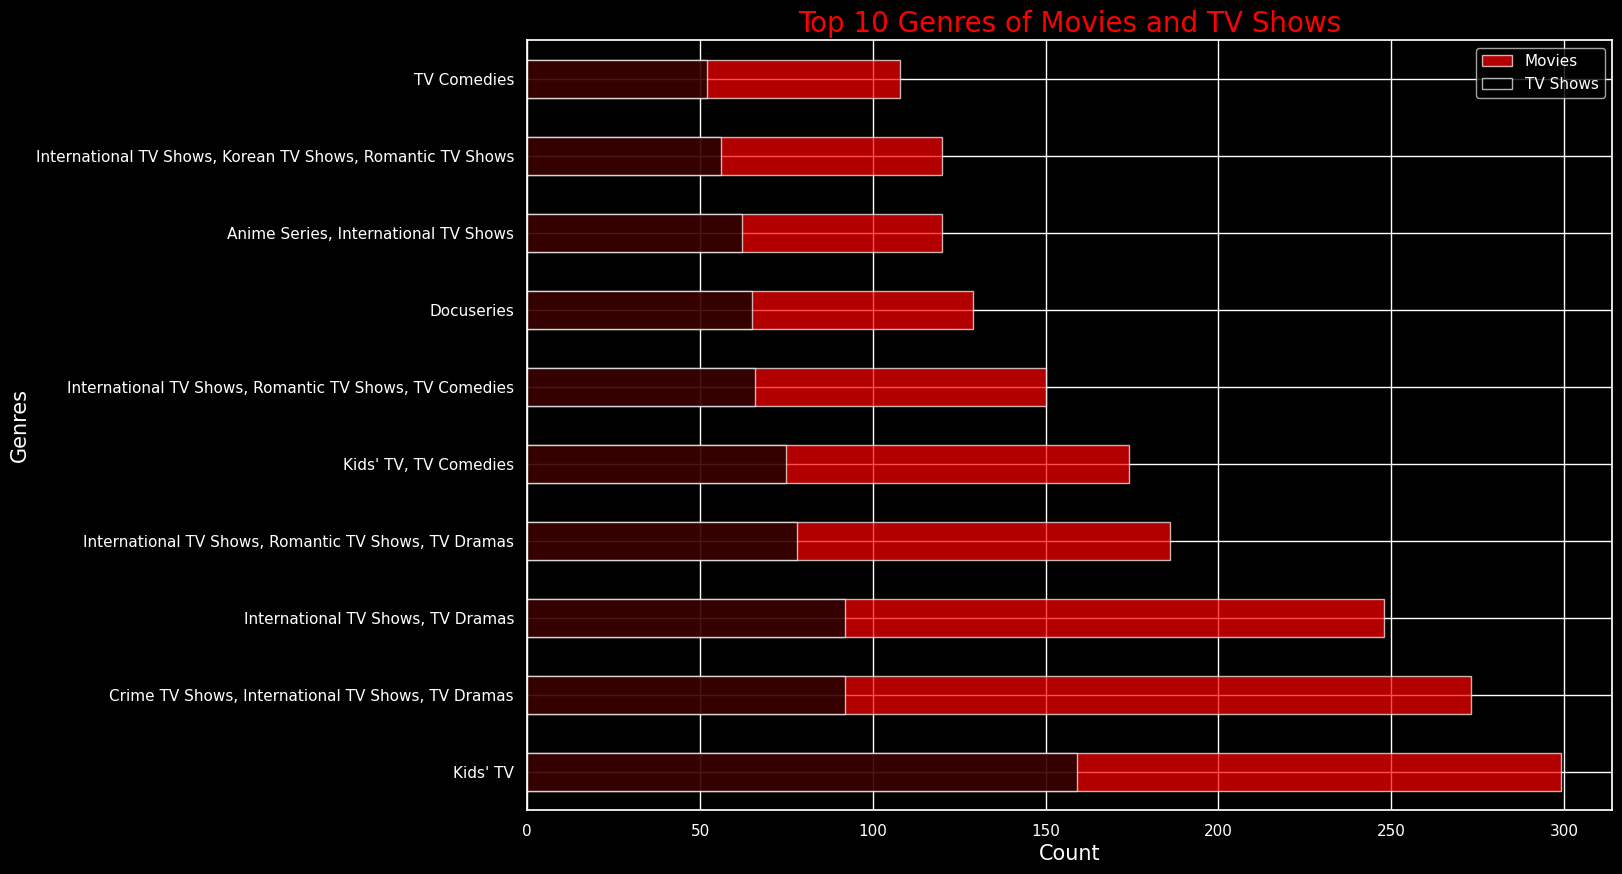

In [9]:
# Top 10 Genres for Movies and TV Shows
plt.figure(figsize=(14,10))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh", color="red", alpha=0.7, label='Movies')
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh", color="black", alpha=0.7, label='TV Shows')
plt.title('Top 10 Genres of Movies and TV Shows', color='red', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Genres', fontsize=15)
plt.legend()
plt.show()

In [10]:
# Step 1: Get the top 10 countries by content count
top_10_countries = df['country'].value_counts().nlargest(10).reset_index()
top_10_countries.columns = ["country", "count"]

# Step 2: Create the choropleth map for the top 10 countries with a readable color scale
fig = px.choropleth(
    top_10_countries,
    locations="country",
    locationmode='country names',
    color="count",
    title="Top 10 Countries by Netflix Content",
    color_continuous_scale=px.colors.sequential.Viridis  # Use a color scale with good contrast
)

# Step 3: Update layout for better readability
fig.update_layout(
    title_text='Netflix Content Distribution by Top 10 Countries',
    title_x=0.5,
    font=dict(color='black'),
    geo=dict(bgcolor='rgba(0,0,0,0)')  # Set the background of the map to transparent
)

# Display the map
fig.show()

<ipython-input-11-bca16fa23ef9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




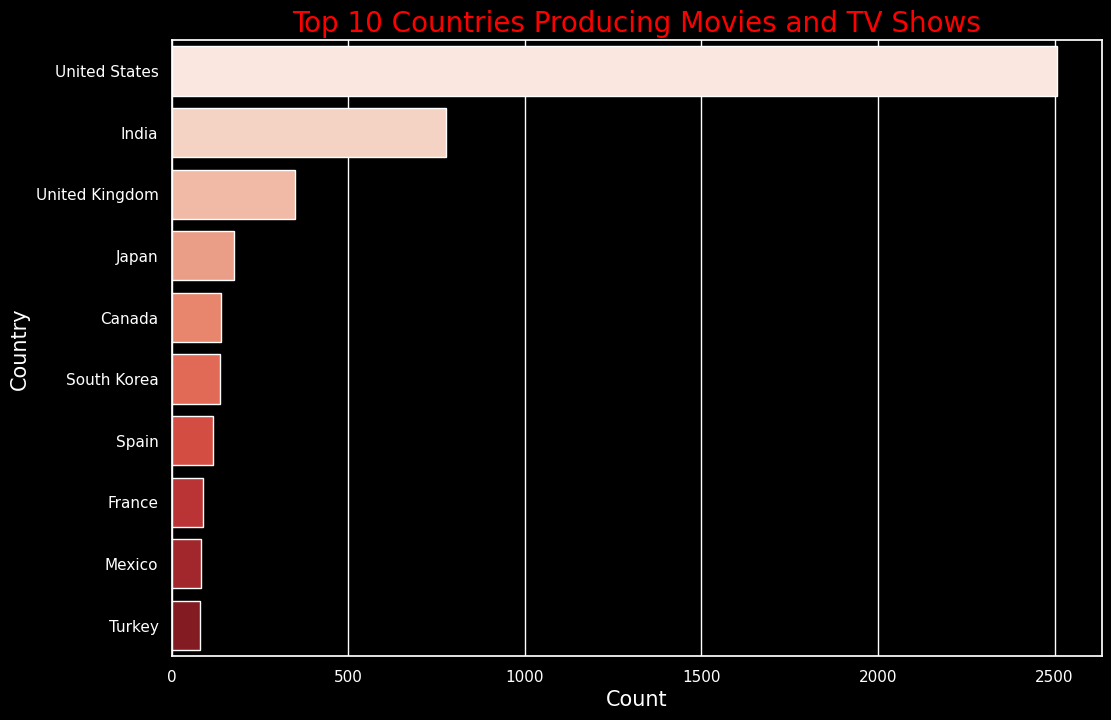

In [11]:
# Top 10 Countries Producing Movies and TV Shows
top_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Reds')
plt.title('Top 10 Countries Producing Movies and TV Shows', color='red', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.show()

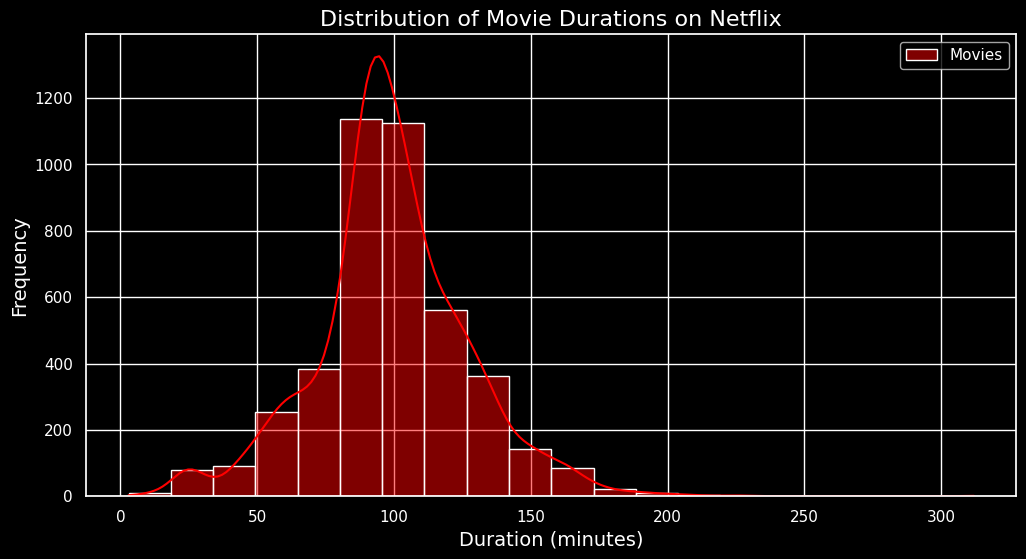

In [12]:
# Distribution of Movie and TV Show Durations
df['duration_num'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else np.nan)
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 'Movie']['duration_num'], bins=20, kde=True, color='red', label='Movies')
plt.title('Distribution of Movie Durations on Netflix', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

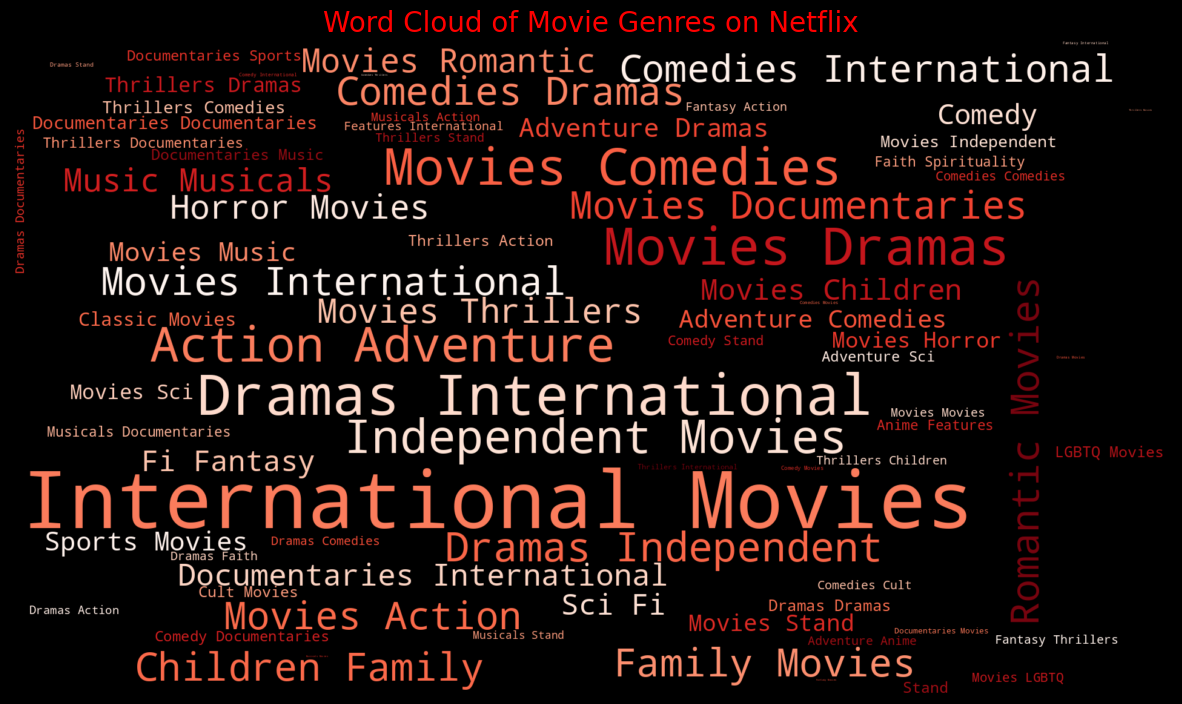

In [13]:
# Word Cloud for Movie Genres
movie_genres = " ".join(df[df['type'] == 'Movie']['listed_in'])
wordcloud_movie_genres = WordCloud(width=1920, height=1080, background_color='black', colormap='Reds').generate(movie_genres)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud_movie_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres on Netflix', fontsize=20, color='red')
plt.show()

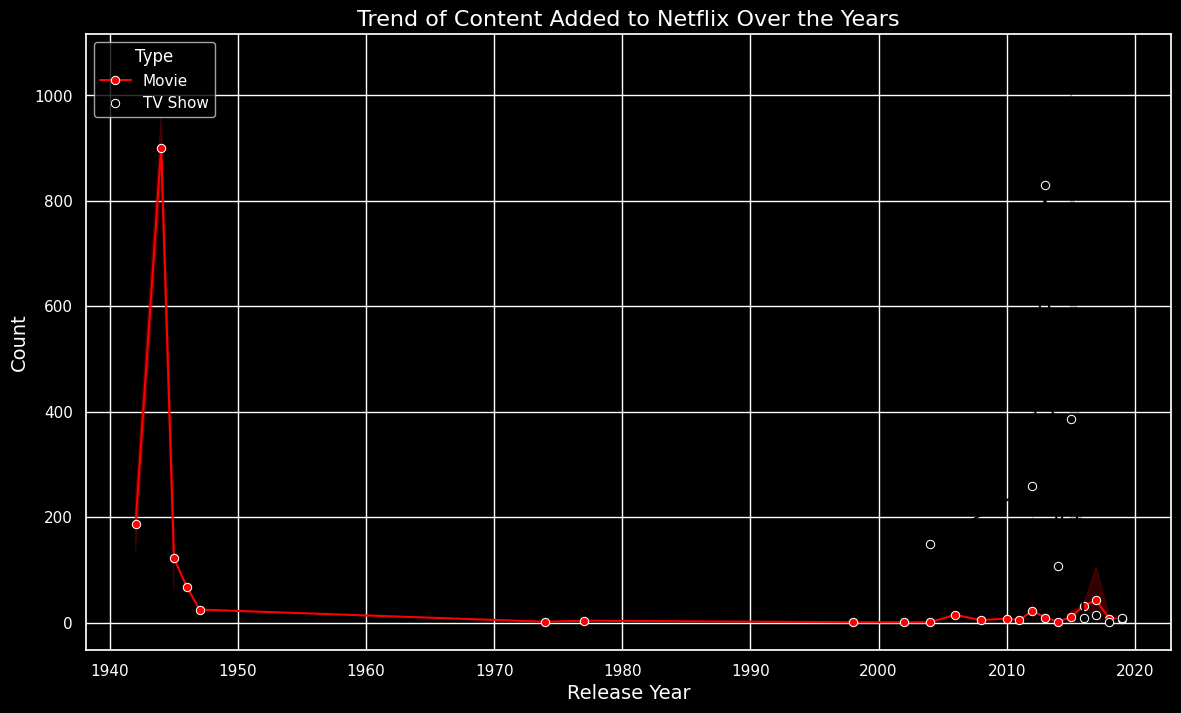

In [14]:
# Trend of Content Added Over the Years
plt.figure(figsize=(14,8))
sns.lineplot(x='release_year', y=df.groupby('release_year')['type'].count(), hue='type', data=df, marker='o', palette=['red', 'black'])
plt.title('Trend of Content Added to Netflix Over the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Type', loc='upper left')
plt.show()

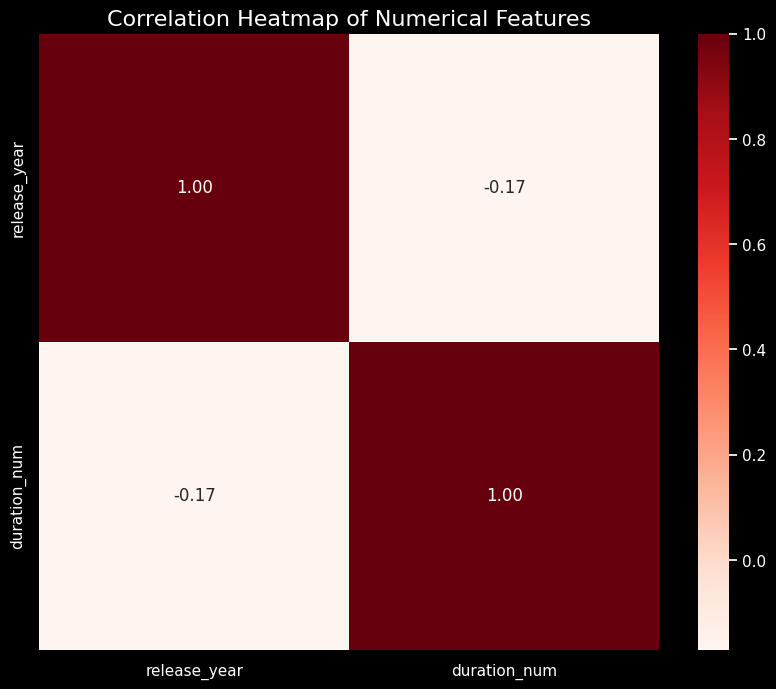

In [15]:
# Correlation Heatmap of Numerical Features
corr_matrix = df[['release_year', 'duration_num']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

<ipython-input-16-1de974ca625d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




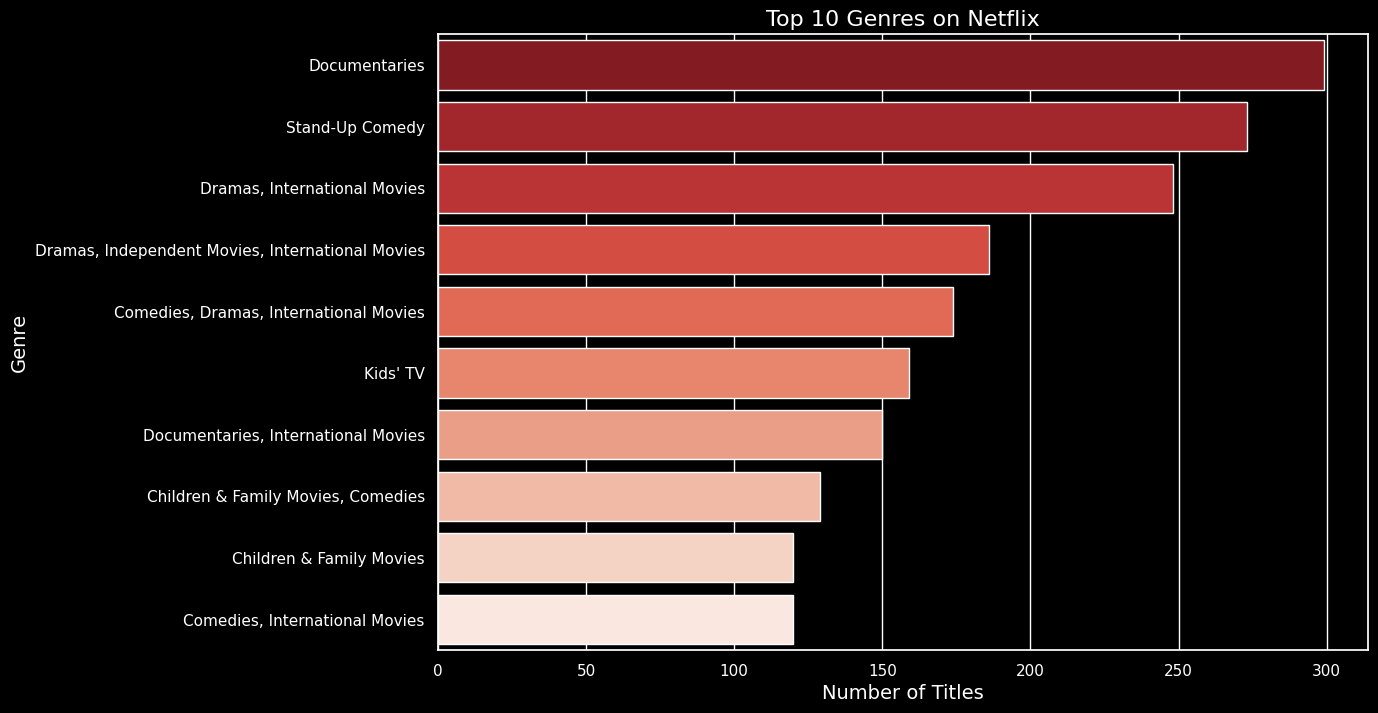

In [16]:
# Distribution of Content by Genre
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in', data=df, order=df['listed_in'].value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

<ipython-input-17-24bea0636639>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




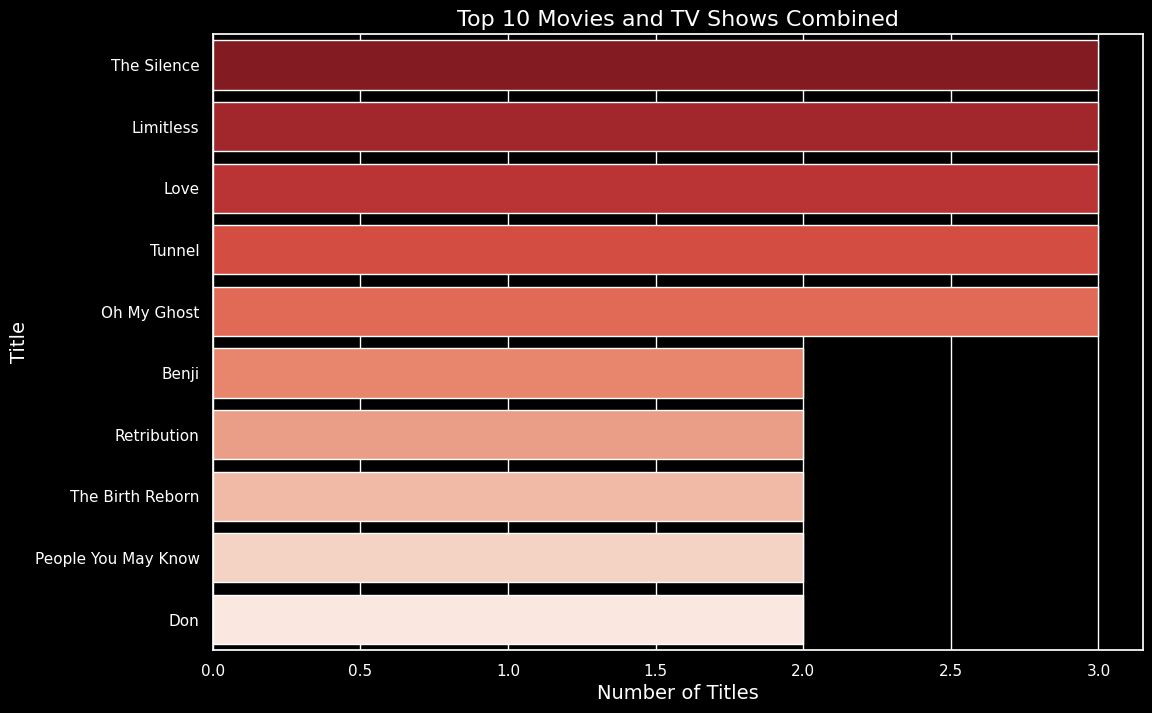

In [17]:
# Top 10 Movies and TV Shows Combined
top_titles = df['title'].value_counts().nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(y=top_titles.index, x=top_titles.values, palette='Reds_r')
plt.title('Top 10 Movies and TV Shows Combined', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Title', fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

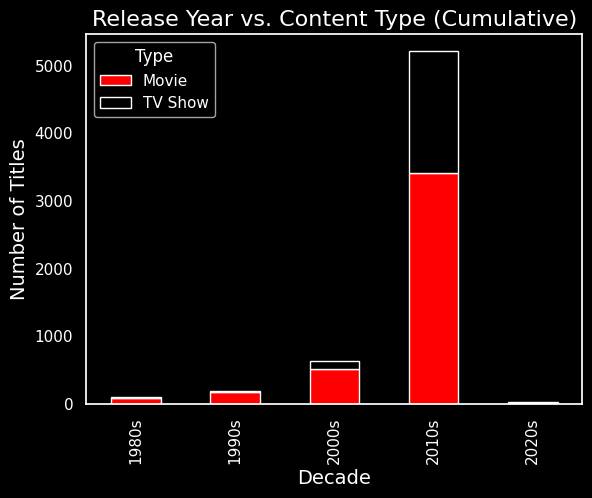

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('path_to_your_file.csv')

# Convert release_year to datetime for better manipulation
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Create a 'Decade' column to group data in 10-year periods
df['Decade'] = (df['release_year'].dt.year // 10 * 10).astype(str) + 's'

# Group by 'Decade' and 'type', then get the size of each group
release_year_type = df.groupby(['Decade', 'type']).size().unstack()

# Calculate cumulative counts for each decade
release_year_type = release_year_type.groupby(level=0).cumsum()

# Filter to include only the most recent 5 decades
recent_decades = sorted(release_year_type.index)[-5:]
release_year_type_recent = release_year_type.loc[recent_decades]

# Plot the data
plt.figure(figsize=(12,8))
release_year_type_recent.plot(kind='bar', stacked=True, color=['red', 'black'])
plt.title('Release Year vs. Content Type (Cumulative)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.legend(title='Type')
plt.grid(False)  # Remove grid lines
plt.show()

In [19]:
# Sunburst Chart of Top-Rated Content by Country
top_rated = df[df['rating'] == 'TV-MA'][:10]
fig = px.sunburst(top_rated, path=['country'])
fig.update_traces(marker=dict(colors=['red', 'black']))
fig.update_layout(title='Top-Rated Content by Country')
fig.show()

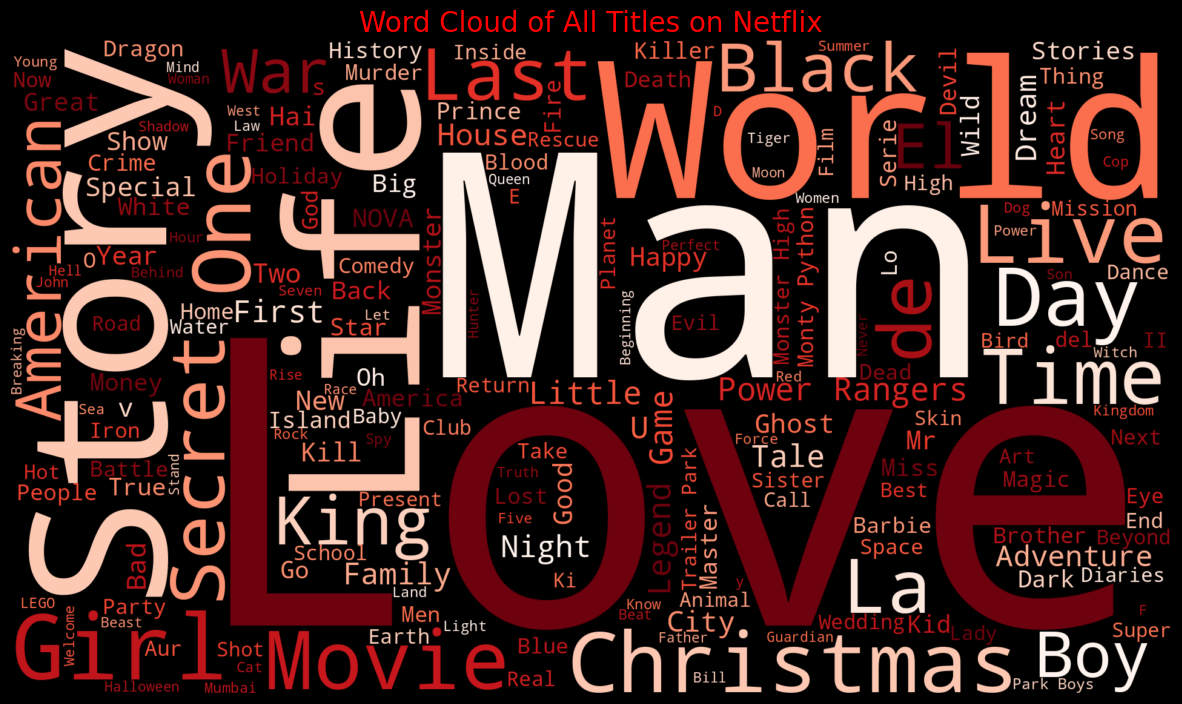

In [20]:
# Combined Word Cloud of Titles
all_titles = " ".join(df['title'])
wordcloud_titles = WordCloud(width=1920, height=1080, background_color='black', colormap='Reds').generate(all_titles)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Titles on Netflix', fontsize=20, color='red')
plt.show()